# LINEAR REGRESSION 

### Import libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import cross_val_score

### Import the dataset

In [2]:
df = sns.load_dataset("mpg") # miles per gallon dataset
print(df.head()) # Check the dataset header
print(df.info()) # Check the dataset info

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

In [3]:
df.drop(["name"], axis = 1, inplace = True) # Dropping the 'name' column

In [4]:
print(df.describe()) # Check the description of the dataset

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


In [5]:
### Preprocess Data

In [6]:
print(df.isnull().sum()) # Check null values
df.dropna(inplace = True) # Dropping null values
print(df.isnull().sum().any()) # Recheck for null values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64
False


### Univariate Analysis

In [7]:
print(df.cylinders.unique()) # Check the unique values of cylinders variable
print(df.cylinders.value_counts()) # Count the entries of each cylinders variable

[8 4 6 3 5]
cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64


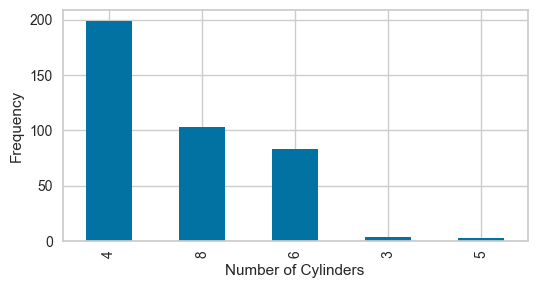

In [8]:
plt.figure(figsize=(6,3))
(df.cylinders.value_counts()).plot(kind='bar')
plt.xlabel('Number of Cylinders')
plt.ylabel('Frequency')
plt.show()

### Correcting the model_year variable for better understanding

In [9]:
df['model_year'] = df['model_year']+1900

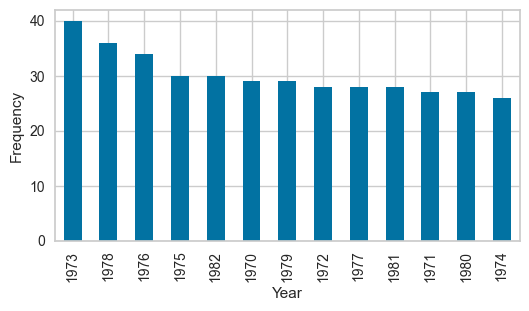

In [10]:
plt.figure(figsize=(6,3))
(df.model_year.value_counts()).plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis

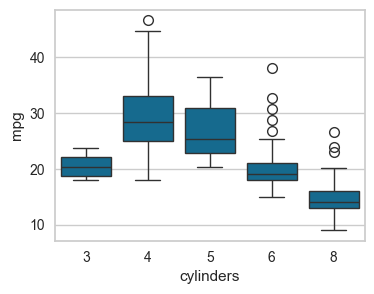

In [11]:
plt.figure(figsize=(4,3))
sns.boxplot(x='cylinders', y='mpg', data=df)
plt.show()

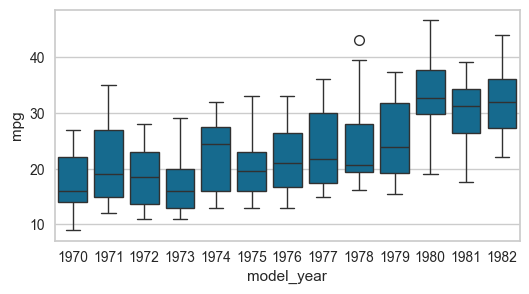

In [12]:
plt.figure(figsize=(6,3))
sns.boxplot(x='model_year', y='mpg', data=df)
plt.show()

### Multivariate Analysis

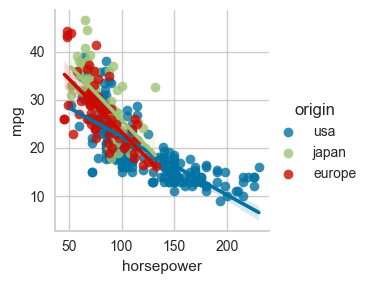

In [13]:
sns.lmplot(x='horsepower', y='mpg',hue = 'origin', data=df, height = 3)

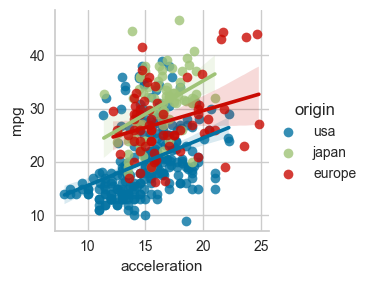

In [14]:
sns.lmplot(x='acceleration', y='mpg',hue = 'origin', data=df, height = 3)

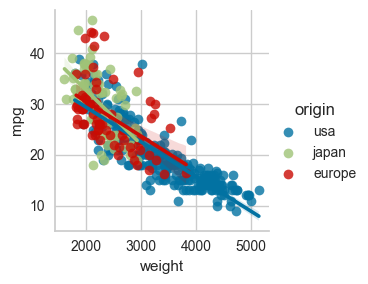

In [15]:
sns.lmplot(x='weight', y='mpg',hue = 'origin', data=df, height = 3)

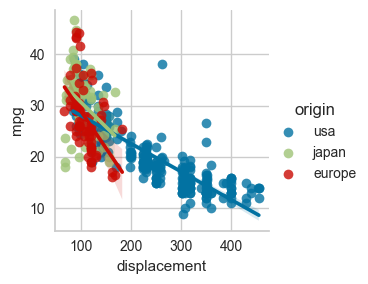

In [16]:
sns.lmplot(x='displacement', y='mpg',hue = 'origin', data=df, height = 3)

### Heatmap matrix

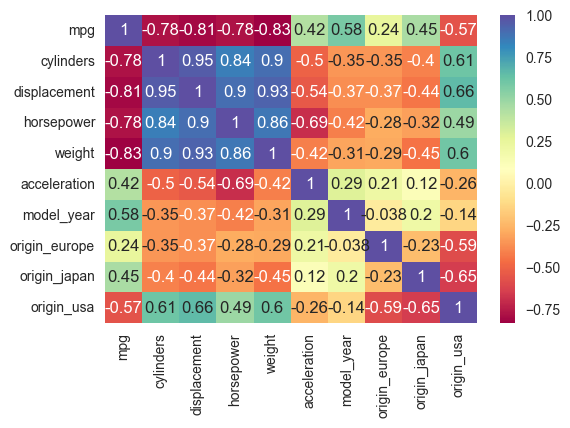

In [17]:
df = pd.get_dummies(df) # Making 'origin' into numbers
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

In [18]:
df.drop(["acceleration", "displacement"], axis = 1, inplace = True) # Removing variables due to high correlation

### Creating an 'age' variable

In [19]:
this_year = datetime.today().year
df['age'] = this_year-df['model_year']
df.drop(["model_year"], axis = 1, inplace = True)

## MODELING

In [20]:
y = df['mpg']                       # This is the target
x = df.drop(['mpg'], axis = 1)      # 

### Splitting data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

### Instantiate the model

In [22]:
lin_model = LinearRegression() # This will instantiate the linear model

### Training the model

In [23]:
lin_model.fit(X_train,Y_train) 

LinearRegression()

In [24]:
print(lin_model.intercept_) # Checking the intercept

75.27183458528945


In [25]:
coeff_params = pd.DataFrame(lin_model.coef_, index = x.columns, columns = ["Coefficient"])
print(coeff_params)

               Coefficient
cylinders         0.163901
horsepower       -0.010519
weight           -0.005776
origin_europe     0.422718
origin_japan      0.857598
origin_usa       -1.280316
age              -0.695417


### Predicting values

In [26]:
Y_pred = lin_model.predict(X_test)

### Comparing results

In [27]:
predict_dict = {"Actual" : Y_test, "Predicted" : Y_pred}
compare = pd.DataFrame(predict_dict)
print(compare) # Comparing predicted and actua(real) values

     Actual  Predicted
20     25.0  21.754939
370    31.0  28.978175
140    14.0  13.672338
153    18.0  19.122141
315    24.3  25.062833
..      ...        ...
14     24.0  23.838320
383    38.0  34.828480
279    29.5  31.054456
110    22.0  25.894663
101    23.0  21.041895

[79 rows x 2 columns]


In [28]:
MAE = mean_absolute_error(Y_test, Y_pred) 
MSE = mean_squared_error(Y_test, Y_pred)  
RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))
R2SCORE = r2_score(Y_test, Y_pred)

In [29]:
print("R2_score:", R2SCORE, "\n","MAE:", MAE, "\n","MSE:",MSE, "\n","RMSE:",RMSE)

R2_score: 0.8101902364529178 
 MAE: 2.734977773718845 
 MSE: 12.932766249542183 
 RMSE: 3.5962155454786333


### Visualizing the error 

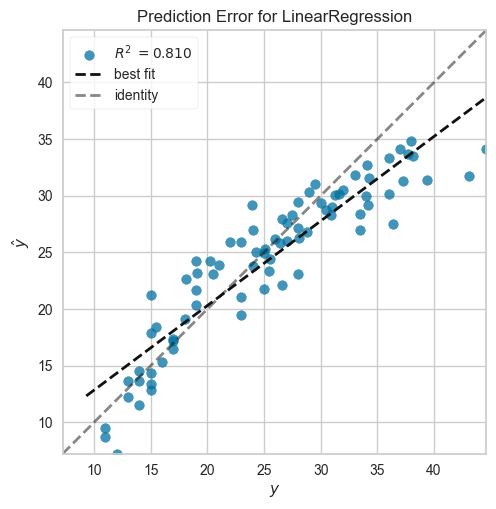

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [30]:
visualizer = PredictionError(lin_model)
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data

visualizer.show() # Finalize and render the figure

### Visualizing the residuals

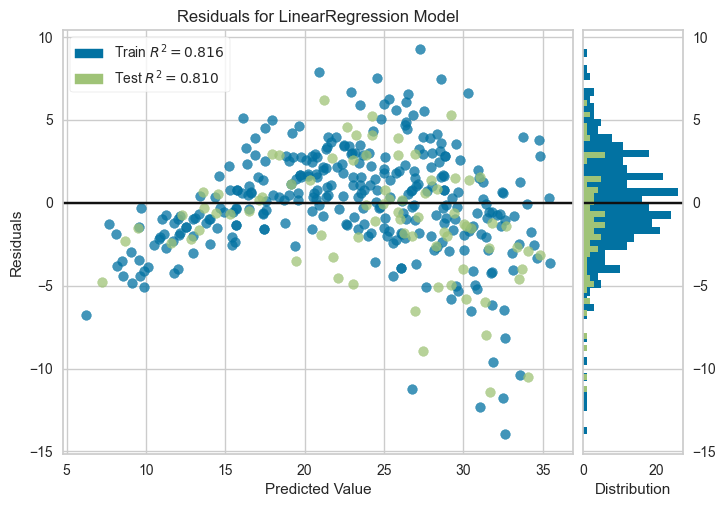

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [31]:
visualizer = ResidualsPlot(lin_model)

visualizer.fit(X_train, Y_train) # Fit the training data to the visualizer
visualizer.score(X_test, Y_test) # Evaluate the model on the test data

visualizer.show() # Finalize and render the figure

### Performing crossvalidation

In [32]:
accuracies = cross_val_score(estimator=lin_model, X=X_train, y=Y_train, cv = 10)
print(accuracies.mean()) # Equivalent to R2_score

accuracies = cross_val_score(estimator=lin_model, X=X_train, y=Y_train, cv = 10, scoring='neg_mean_squared_error')
print(-accuracies.mean()) # Equivalent to MSE

0.795145826811186
11.172151940524156
